# N Advanced Matplotlib Functions You Must Know To Create Killer Visuals
## Subtitle TODO

![](images/unsplash.jpg)
<figcaption style="text-align: center;">
    <strong>
Photo by <a href="https://unsplash.com/@joycoast?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Joycoast Wood Watches & Sunglasses</a> on <a href="https://unsplash.com/s/photos/men%20in%20suit?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
      </strong>
</figcaption>

# Setup

In [1]:
import logging
import time
import warnings

import catboost as cb
import datatable as dt
import joblib
import lightgbm as lgbm
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import shap
import umap
import umap.plot
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.compose import *
from sklearn.impute import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import *

logging.basicConfig(
    format="%(asctime)s - %(message)s", datefmt="%d-%b-%y %H:%M:%S", level=logging.INFO
)
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore")
pd.set_option("float_format", "{:.5f}".format)

# Intro

# rcParams

Let's start from the highest-level concepts. 

The first in our list is the `rcParams` dictionary. This dictionary contains all Matplotlib settings that are used to create the default styles of the figures. You import it directly from the `matplotlib` namespace:

In [127]:
from matplotlib import rcParams

```python
>>> rcParams
...
'axes.grid': False,
'axes.grid.axis': 'both',
'axes.grid.which': 'major',
'axes.labelcolor': 'black',
'axes.labelpad': 4.0,
'axes.labelsize': 'medium',
'axes.labelweight': 'normal',
'axes.linewidth': 0.8,
...
```

```python
rcParams['figure.figsize'] = 8, 6
rcParams['legend.fontsize'] = "large"
rcParams['xtick.major.size'] = 4
rcParams['xtick.minor.size'] = 1
```

When working on different projects, you will have to render your charts on different environments and for different audiences. Based on this, you have to tweak this dictionary beforehand so that all your future visuals have a consistent theme and style. It will also save time because you avoid calling the same parameters every time you create a new plot.

If you ever mess something up or want to get back to the defaults, you can call the `rcdefaults` function of PyPlot, which resets everything.

In [137]:
plt.rcdefaults()

# Get_* functions

Under the hood, Matplotlib is fully-object oriented.

![](images/1.png)

Every individual component you see on the above diagram is implemented as a separate class. All these separate classes inherit from the base class called Matplotlib Artist. That's why you will often read the word on MPL documentation. 

Having a separate class for every single aspect of a plot introduces a certain level of complexity but it also gives you a lot of flexibility. 

The key to a great plot is customization. Not just simple changes to the plot, but customization at the deepest levels. You should be able to tweak every single component of your visuals so that it aligns with your taste, your theme and professionalism. 

To achieve this, you should know how to extract the components you want to customize. Fortunately, Matplotlib has many functions that starts with `get_` prefix, which allows you to retrieve different classes from the created figure or axes. Here is an example:

['get_adjustable',
 'get_agg_filter',
 'get_alpha',
 'get_anchor',
 'get_animated',
 'get_aspect',
 'get_autoscale_on',
 'get_autoscalex_on',
 'get_autoscaley_on',
 'get_axes_locator',
 'get_axisbelow',
 'get_box_aspect',
 'get_children',
 'get_clip_box',
 'get_clip_on',
 'get_clip_path',
 'get_contains',
 'get_cursor_data',
 'get_data_ratio',
 'get_default_bbox_extra_artists',
 'get_facecolor',
 'get_fc',
 'get_figure',
 'get_frame_on',
 'get_geometry',
 'get_gid',
 'get_gridspec',
 'get_images',
 'get_in_layout',
 'get_label',
 'get_legend',
 'get_legend_handles_labels',
 'get_lines',
 'get_navigate',
 'get_navigate_mode',
 'get_path_effects',
 'get_picker',
 'get_position',
 'get_rasterization_zorder',
 'get_rasterized',
 'get_renderer_cache',
 'get_shared_x_axes',
 'get_shared_y_axes',
 'get_sketch_params',
 'get_snap',
 'get_subplotspec',
 'get_tightbbox',
 'get_title',
 'get_transform',
 'get_transformed_clip_path_and_affine',
 'get_url',
 'get_visible',
 'get_window_extent',
 'g

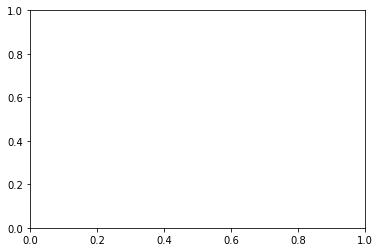

In [29]:
fig, ax = plt.subplots()

[func for func in dir(ax) if func.startswith("get")]

Let's say you want to customize the xticks of this plot:

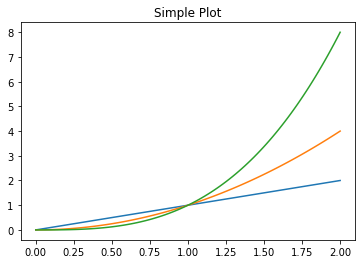

In [41]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots()  # Create a figure and an axes.

l1 = ax.plot(x, x, label="linear")
l2 = ax.plot(x, x ** 2, label="quadratic")
l3 = ax.plot(x, x ** 3, label="cubic")

ax.set_title("Simple Plot")

plt.show()

It is easy, just call `get_xticklabels` on the axes object and you get a list of Matplotlib Text instances:

In [132]:
ax.get_xticklabels()

[Text(0, 0, 'Ideal'),
 Text(1, 0, 'Premium'),
 Text(2, 0, 'Very Good'),
 Text(3, 0, 'Good'),
 Text(4, 0, 'Fair')]

You can also tweak the tick lines using `get_xticklines` or the location of the ticks with `get_xticks`.

You might be wondering, how do we actually tweak these objects? We will answer this question in the next section.

# getp / setp

Once you have the component you want to customize, you should know what kind of properties or parameters they accept. This is where you use two Swiss army knives of Matplotlib. 

First, call `plt.getp` function on your object to see what parameters it currently has. For example, let's say we want to style the second line of the below plot:

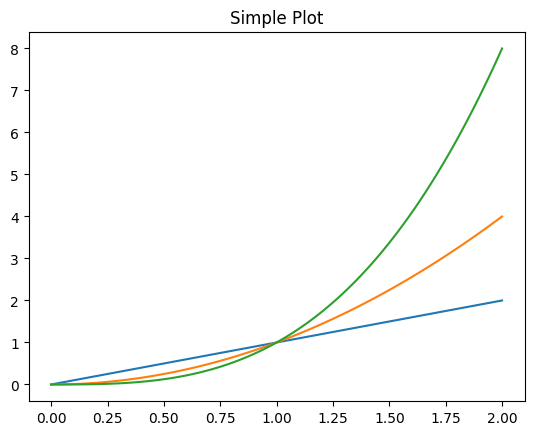

In [138]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots()  # Create a figure and an axes.

l1 = ax.plot(x, x, label="linear")
l2 = ax.plot(x, x ** 2, label="quadratic")
l3 = ax.plot(x, x ** 3, label="cubic")

ax.set_title("Simple Plot")

plt.show()

As you can see, I stored each line plot into a separate variable so that we can use them later. Now, we call `plt.getp` on the second line `l2`:

In [140]:
plt.getp(l2)

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    color or c = #ff7f0e
    contains = None
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([0.        , 0.02020202, 0.04040404, 0.0606...
    drawstyle or ds = default
    figure = Figure(640x480)
    fillstyle = full
    gid = None
    in_layout = True
    label = quadratic
    linestyle or ls = -
    linewidth or lw = 1.5
    marker = None
    markeredgecolor or mec = #ff7f0e
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = #ff7f0e
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    path = Path(array([[0.00000000e+00, 0.00000000e+00],     ...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = False
    sketch_params = None
    snap = None
    solid_capstyle = projecting
 

As expected, the function printed out the default values of the second line. To change a property, we will use another function - `plt.setp`. Calling this on an object without any parameters prints out what possible values the object accepts for its properties:

In [141]:
plt.setp(l2)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec: color
  markeredgewidth or mew: floa

To print possible values for only a single property, you can give the name of the property as a string to `setp`:

In [142]:
plt.setp(l2, "linestyle")

  linestyle: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}


Now, let's finally make a few changes to the second line:

In [143]:
plt.setp(l2, linestyle="-.", lw=5, color="red", alpha=0.5)

[None, None, None, None]

To see the current figure after the changes, just call `get_figure` on the figure object:

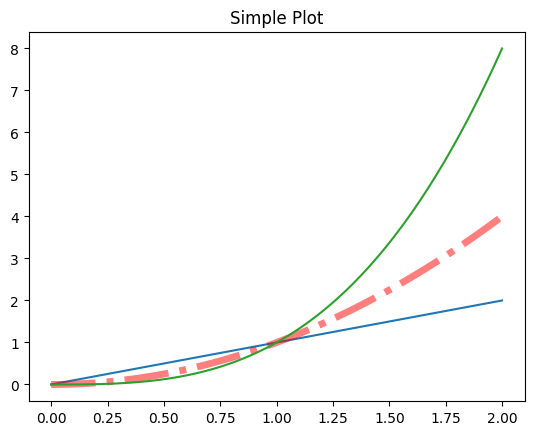

In [144]:
fig.get_figure()

As you can see, the second line is completely different from the rest.

In a nutshell, if you want to style a specific component of your plot, here are the steps you should follow:

1. Identify the name of the component, either by intuition or the documentation of MPL.
2. Extract it using its relevant `get_*` function
3. See its current properties with `plt.getp`
4. Find out what possible values each property accepts with `plt.setp`
5. Change the parameters you want with `plt.setp`.

# Legends

A legend is an important part of complex plots with many different components. A great plot doesn't leave its audience guessing and providing accurate and "easy on the eye" information inside a legend is crucial to achieve this. 

Fortunately, you can control the legends of any plot using only the `legend` function with `plt.legend` inside a PyPlot API or `ax.legend` in OOP API. Calling the function with no parameters creates a legend with defaults:

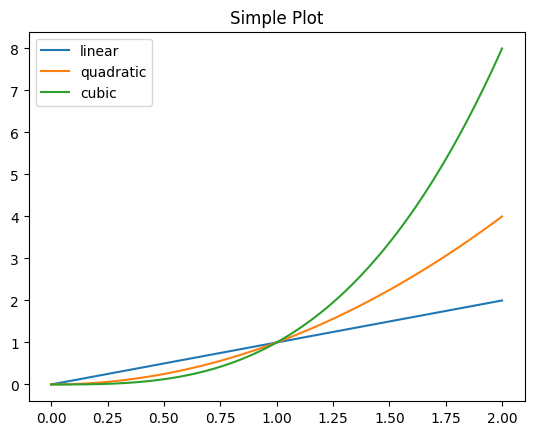

In [145]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots()  # Create a figure and an axes.

l1 = ax.plot(x, x, label="linear")
l2 = ax.plot(x, x ** 2, label="quadratic")
l3 = ax.plot(x, x ** 3, label="cubic")

ax.set_title("Simple Plot")

ax.legend()

plt.show()

However, as I have said, we want to customize every component to make them as beautiful as possible and we can rarely say so when it comes to Matplotlib defaults. 

Therefore, I suggest reading the Matplotlib documentation of the `legend` function ([link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)). However, I'd say the most important parameters of a legend are these:

- `loc` - location of the legend
- `bbox_to_anchor` - another location parameter, specific to the rounding box of the legend (read the docs for details)
- Font properties - size, color, style
- `ncol` - number of columns inside a legend when there are many elements

You can also change these parameters after the legend is created. Simply extract it with `get_legend` and use the `getp`, `setp` functions. 

# cycler

Do you ever wonder how Matplotlib changes its colors or *cylces* through different styles all by itself? 

The reason is that, under the hood, Matplotlib uses Python built-in objects called Cyclers:

In [154]:
from cycler import cycler

c1 = cycler(arg1=[1, 2, 3, 4])
c1

1
2
3
4


The `cycle` function is very versatile. It accepts any key-value parameter and creates a list of dictionaries:

In [156]:
c2 = cycler(arg2=list("rgba"))

for i in c2:
    print(i)

{'arg2': 'r'}
{'arg2': 'g'}
{'arg2': 'b'}
{'arg2': 'a'}


Besides, you can combine multiple cyclers with the "plus" and "multiply" operators to get the index-to-index or exhaustive combination of parameters:

In [157]:
for i in c1 + c2:
    print(i)

{'arg1': 1, 'arg2': 'r'}
{'arg1': 2, 'arg2': 'g'}
{'arg1': 3, 'arg2': 'b'}
{'arg1': 4, 'arg2': 'a'}


Now that we know what cyclers are, we can create custom ones and pass them to our plots so Matplotlib only uses the parameters we specified. Below, we are creating 4 different line styles that allow Matplotlib to cycle through different line colors, styles and weights:

In [155]:
line_prop_cycler = (
    cycler(color=list("rgcy"))
    + cycler(ls=["-", "--", "-.", ":"])
    + cycler(lw=[3, 6, 9, 12])
)

You can pass this custom cycler to a plot using the `set_prop_cycle` function of the axes object:

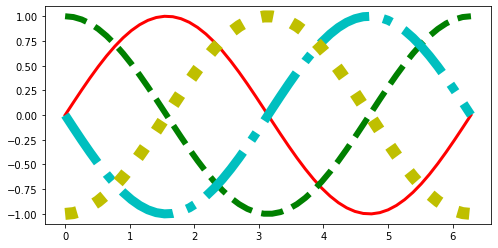

In [83]:
x = np.linspace(0, 2 * np.pi, 50)
offsets = np.linspace(0, 2 * np.pi, 4, endpoint=False)
yy = np.transpose([np.sin(x + phi) for phi in offsets])

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_prop_cycle(line_prop_cycler)  # Set propcycle before plotting
ax.plot(x, yy)

plt.show();

As you can see, the lines of the sine waves are completely different. 

When creating cyclers, it is important that each of their parameters and values align with Matplotlib. For example, to create a cycler that iterates different colors, you should know what kind of colors Matplotlib allows for its plots. 

You can also add your custom cyclers to the `rcParams` dictionary. Here are the defaults:

In [158]:
rcParams["axes.prop_cycle"]

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


# tick_params

All the arguments I presented about legends holds true for axis ticks. The axis ticks should accurately convey the min and max of your data points, what units are they in and display several important check points for easy comparison between different parts of a plot. 

Just like legend, majority of tick properties can be controlled with `tick_params` ([docs link](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)) function of the axes object. Here are a few of them as an example:

```python
>>> ax.tick_params()

Parameters
----------
axis : {'x', 'y', 'both'}, default: 'both'
    The axis to which the parameters are applied.
which : {'major', 'minor', 'both'}, default: 'major'
    The group of ticks to which the parameters are applied.
reset : bool, default: False
    Whether to reset the ticks to defaults before updating them.

Other Parameters
----------------
direction : {'in', 'out', 'inout'}
    Puts ticks inside the axes, outside the axes, or both.
length : float
    Tick length in points.
width : float
    Tick width in points.
color : color
    Tick color.
```

The first couple of parameters you should always specify is `axis` and `which`. Depending on these, the parameters you specify will apply to the X or Y axis ticks, and either to minor or major ticks. 

BTW, most of the time, minor ticks will not be visible in Matplotlib. To quickly turn them on, use the `minorticks_on` function on the axes object:

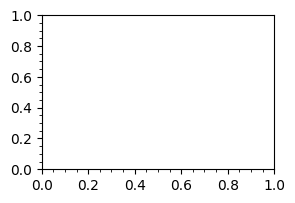

In [161]:
fig, ax = plt.subplots(figsize=(3, 2))

ax.minorticks_on()

Here is a [great resource](https://e2eml.school/matplotlib_ticks.html) that shows more about the `tick_params` function.

# Tickers

Sometimes, you don't want to go to the trouble of giving custom tick parameters. In that case, you can use many of the built-in Matplotlib's collection of tick parameter "themes" called tickers.

In [84]:
from matplotlib import ticker

In [87]:
dir(ticker)

['AutoLocator',
 'AutoMinorLocator',
 'EngFormatter',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'IndexFormatter',
 'IndexLocator',
 'Integral',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogFormatterSciNotation',
 'LogLocator',
 'LogitFormatter',
 'LogitLocator',
 'MaxNLocator',
 'MultipleLocator',
 'NullFormatter',
 'NullLocator',
 'OldAutoLocator',
 'OldScalarFormatter',
 'PercentFormatter',
 'ScalarFormatter',
 'StrMethodFormatter',
 'SymmetricalLogLocator',
 'TickHelper',
 '_DummyAxis',
 '_Edge_integer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_decade_greater',
 '_decade_greater_equal',
 '_decade_less',
 '_decade_less_equal',
 '_if_refresh_overridden_call_and_emit_deprec',
 '_log',
 'cbook',
 'is_close_to_int',
 'is_decade',
 'itertools',
 'locale',
 'logging',
 'math',
 'mpl',
 'mt

As you can see, there are many of them under the `tick` submodule. I suggest going through a few of them using the docs to get an idea of what each of them does. 

Generally, the ones with `Locator` in their titles control the location of the ticks. `Formatter`s lets you style the tick labels. Mostly, you will use a pair of locator and formatters based on your needs. Once you choose from the above list, you can pass them to your plot with:

In [162]:
from matplotlib.ticker import EngFormatter

ax.xaxis.set_major_formatter(EngFormatter())

Use either `xaxis` or `yaxis` properties of the axes object and call `set_major(minor)_formatter(locator)` functions, passing in the class name. Above, we are formatting the X Axis ticks using the Engineering notation. 

# Adding custom grids

One of the subtlest and yet, most impactful elements of some plots are gridlines. 

A rule of thumb is that you need to create grids when the horizontal and vertical change in your plots would convey additional meaning to the context. For example, horizontal grids are useful when there are many bars in a plot or better differentiate between multiple line plots to make the locations of increases, intersections and differences more distinct. 

In Matplotlib, you can create and customize the grids using the `grid` function of the axes object. Here is an ugly vertical grid  as an example:

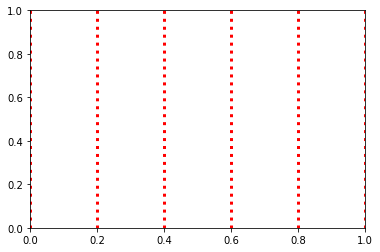

In [91]:
fig, ax = plt.subplots()

ax.grid(axis="x", linestyle=":", lw=3, color="r")

I suggest you read [the docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html) for details.

# plt.bar_label()

Bar charts are common during data analysis. Their most important aspect is the height of each bar, so, you need to make it easy for your audience to differentiate between each bar. This is where you need to use bar labels. 

You can do it manually using some arithmetic calculations to place a text annotation above each bar but there is a better way. The `bar_label` function accepts a BarContainer object as a parameter and automatically annotates each bar with its height. 

Here is a simple countplot with Seaborn:

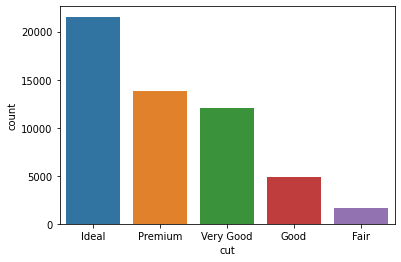

In [120]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")

ax = sns.countplot(diamonds["cut"])

The `BarContainer` object gets added to a plot every time you create a plot using Seaborn or using functions like `ax.bar`. Then, you can retrieve this container object using the `containers` attribute of the axes object:

In [121]:
ax.containers

[<BarContainer object of 5 artists>]

As you can see, there is a BarContainer object with 5 bars in the above list. Now, we just pass this object to bar label after creating the plot:

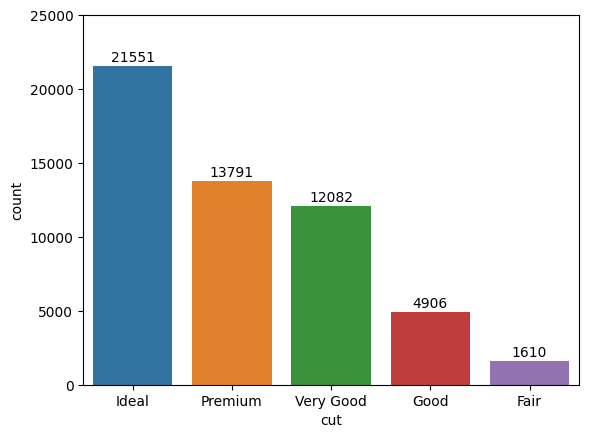

In [163]:
ax = sns.countplot(diamonds["cut"])
ax.bar_label(ax.containers[0], padding=1)
ax.set_ylim(0, 25000)
plt.show();

Note that you need to fix the axis limits when the bar labels get cramped. 

# zorder

Finally, we have another subtle aspect of plots - order of display. This is an important concept when you are overlaying different plots. You need to make sure that each plot gets drawn on the canvas in proper order. To achieve this, you need the `zorder` parameter. 

Below, we are creating 3 lines (taken from the docs) with different zorders:

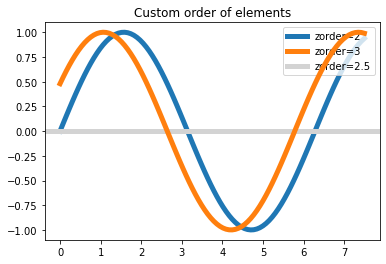

In [119]:
x = np.linspace(0, 7.5, 100)

plt.plot(x, np.sin(x), label="zorder=2", zorder=2)  # bottom
plt.plot(x, np.sin(x + 0.5), label="zorder=3", zorder=3)
plt.axhline(0, label="zorder=2.5", color="lightgrey", zorder=2.5)

plt.title("Custom order of elements")

l = plt.legend(loc="upper right")
l.set_zorder(2.5)  # legend between blue and orange line

plt.show()

The effect is clearly visible. If you pay attention, the zorder of the legend is specified using the `set_zorder` function, which is also acceptable. Besides, you can change zorder of any object using the previous `plt.setp` function as well.

# Summary